In [2]:
#1)DATA PREPROCESSING

In [4]:
pip install pydot

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset=pd.read_csv(r"Churn_Modelling.csv")

In [7]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
#Missing Values

In [9]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
#drop irrelevant columns

In [11]:
dataset.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [12]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
dataset["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
dataset["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
#One Hot Encoding

In [16]:
dataset=pd.get_dummies(dataset,columns=["Geography","Gender"],drop_first=True)

In [17]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [18]:
#Independent variables
#remove the dependent variable

In [19]:
x=dataset.drop("Exited",axis=1)

In [20]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [21]:
type(x)

pandas.core.frame.DataFrame

In [22]:
x.shape

(10000, 11)

In [23]:
y=dataset["Exited"]

In [24]:
type(y)

pandas.core.series.Series

In [25]:
#SPLIT TRAIN DATA AND TEST DATA

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#testdata 20%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [29]:
x_train.shape

(8000, 11)

In [30]:
x_test.shape

(2000, 11)

In [31]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [32]:
#scaling or standardisation or normalisation

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
#creating object
sc=StandardScaler()

In [35]:
#fit --to apply the formula
#transform--
x_train=sc.fit_transform(x_train)

In [36]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [37]:
x_test=sc.transform(x_test)

In [38]:
x_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [39]:
#BUILDING NEURAL NETWORK

In [40]:
#building the architecture

In [41]:
#import required libraries
!pip install tensorflow

In [42]:
from tensorflow.keras import Sequential 
#sequential helps us to initialise the NN Model
#i.e create the instance of the NN model 

In [43]:
from tensorflow.keras.layers import Input

In [44]:
from tensorflow.keras.layers import Dense

In [45]:
#Init the NN MOdel

In [46]:
nn_model=Sequential()

In [47]:
#adding input layer

In [48]:
#no.of neurons in input layer=number of features
inp_layer = Input(shape=(x_train.shape[1],))

In [49]:
nn_model.add(inp_layer)

In [50]:
#add hidden layer

In [98]:
#units tells the no.of neurons in the particular layer
#kernel_initialiszer--stratergy for initialising weights
#bias_initializer--for bias
#activation function is RELU
hidden_layer = Dense(units = 10, kernel_initializer="random_uniform",
                     bias_initializer="random_uniform",
                             activation="relu")

In [99]:
nn_model.add(hidden_layer)

In [100]:
#add output layer

In [101]:
output_layer=Dense(units=1, kernel_initializer="random_uniform",
                     bias_initializer="random_uniform",
                             activation="sigmoid")

In [102]:
#compile model

In [103]:
#mention stragtegies to be followed while training process 
#loss--error calculating strategy
#optimiser--weights updation strategy
#metrics help us calulate accuracy for every epoch i.e model performance calculating strategy
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [104]:
nn_model.add(output_layer)

In [105]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162 (648.00 B)

 Trainable params: 162 (648.00 B)

 Non-trainable params: 0 (0.00 B)

In [106]:
from tensorflow.keras.utils import plot_model

In [107]:
plot_model(nn_model, show_shapes=True, show_dtype=True, show_layer_activations=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [108]:
#TRAIN MODEL

In [109]:
x_train.shape

(8000, 11)

In [110]:
logs=nn_model.fit(x_train, y_train, batch_size =32 ,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6010 - loss: 0.6634
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7955 - loss: 0.4912
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7949 - loss: 0.4551
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7903 - loss: 0.4416
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7923 - loss: 0.4199
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.3928
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7957 - loss: 0.3891
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8318 - loss: 0.3782
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8479 - loss: 0.3742
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8519 - loss: 0.3684


In [111]:
logs.history


{'accuracy': [0.7350000143051147,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.809374988079071,
  0.8371250033378601,
  0.8453750014305115,
  0.8464999794960022],
 'loss': [0.6119405627250671,
  0.480620801448822,
  0.450001060962677,
  0.42855581641197205,
  0.411422461271286,
  0.39744994044303894,
  0.3862006962299347,
  0.3805188238620758,
  0.37678730487823486,
  0.37387707829475403]}

In [112]:
loss=logs.history["loss"]

In [113]:
loss

[0.6119405627250671,
 0.480620801448822,
 0.450001060962677,
 0.42855581641197205,
 0.411422461271286,
 0.39744994044303894,
 0.3862006962299347,
 0.3805188238620758,
 0.37678730487823486,
 0.37387707829475403]

In [114]:
epochs = list(range(1,len(loss)+1))

In [115]:
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Text(0, 0.5, 'Loss')

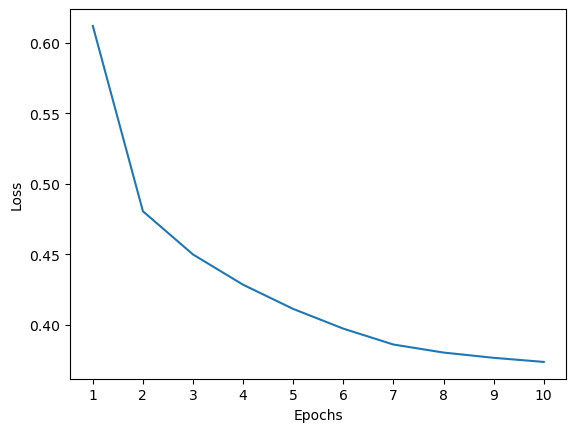

In [116]:
plt.plot(epochs,loss)
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [117]:
accuracy=logs.history["accuracy"]

Text(0, 0.5, 'accuracy')

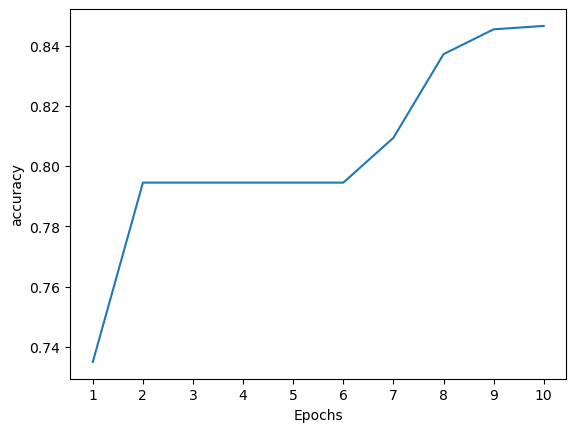

In [118]:
plt.plot(epochs,accuracy)
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel("accuracy")

In [119]:
#EVALUATE MODEL

In [120]:
x_test.shape

(2000, 11)

In [121]:
y_pred=nn_model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [122]:
y_pred

array([[0.06448622],
       [0.03811819],
       [0.11515214],
       ...,
       [0.52196425],
       [0.10804143],
       [0.32287303]], dtype=float32)

In [123]:
y_pred=y_pred>0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [124]:
y_pred=y_pred.astype("int")

In [125]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [126]:
from sklearn.metrics import accuracy_score,classification_report

In [127]:
accuracy_score(y_test,y_pred)

0.8515

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.74      0.38      0.50       393

    accuracy                           0.85      2000
   macro avg       0.80      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000



In [129]:
#Save the model

In [130]:
nn_model.save("bank_churn.h5")

In [131]:
import joblib

In [132]:
import numpy as np

In [133]:
joblib.dump(sc,"bank_scaler.pkl")

['bank_scaler.pkl']

In [134]:
list(x.iloc[140,:])

[756.0, 44.0, 10.0, 137452.09, 1.0, 1.0, 0.0, 189543.9, 1.0, 0.0, 1.0]

In [135]:
x.iloc[140,:]

CreditScore             756.00
Age                      44.00
Tenure                   10.00
Balance              137452.09
NumOfProducts             1.00
HasCrCard                 1.00
IsActiveMember            0.00
EstimatedSalary      189543.90
Geography_Germany         1.00
Geography_Spain           0.00
Gender_Male               1.00
Name: 140, dtype: float64

In [136]:
list(x.iloc[290,:])

[703.0, 42.0, 9.0, 63227.0, 1.0, 0.0, 1.0, 137316.32, 1.0, 0.0, 1.0]